In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv("diabetes_original.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
x = df.drop(["Outcome"], axis=1)
y = df.Outcome
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [4]:
Dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
Dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [5]:
Predicted = Dt.predict(X_test)
Predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [6]:
accuracy_score(Y_test, Predicted)

0.7987012987012987

In [7]:
dt_score = cross_val_score(Dt,x,y,cv=10)
print(dt_score)

[0.72727273 0.72727273 0.72727273 0.67532468 0.71428571 0.79220779
 0.75324675 0.80519481 0.71052632 0.75      ]


In [8]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,Predicted))
print(confusion_matrix(Y_test,Predicted))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

[[88 11]
 [20 35]]


In [10]:
y = confusion_matrix(Y_test,Predicted)


Text(0.5, 48.29999999999998, 'Predicted label')

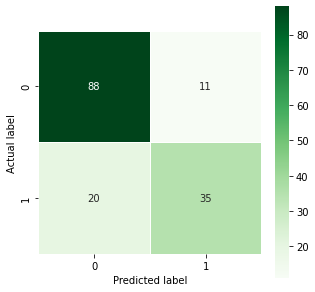

In [11]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(Y_test,Predicted),linewidths=.5, annot=True,square = True,  cmap = 'Greens')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

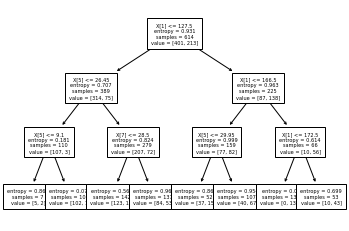

In [12]:
from sklearn import tree
tree.plot_tree(Dt,fontsize=5);

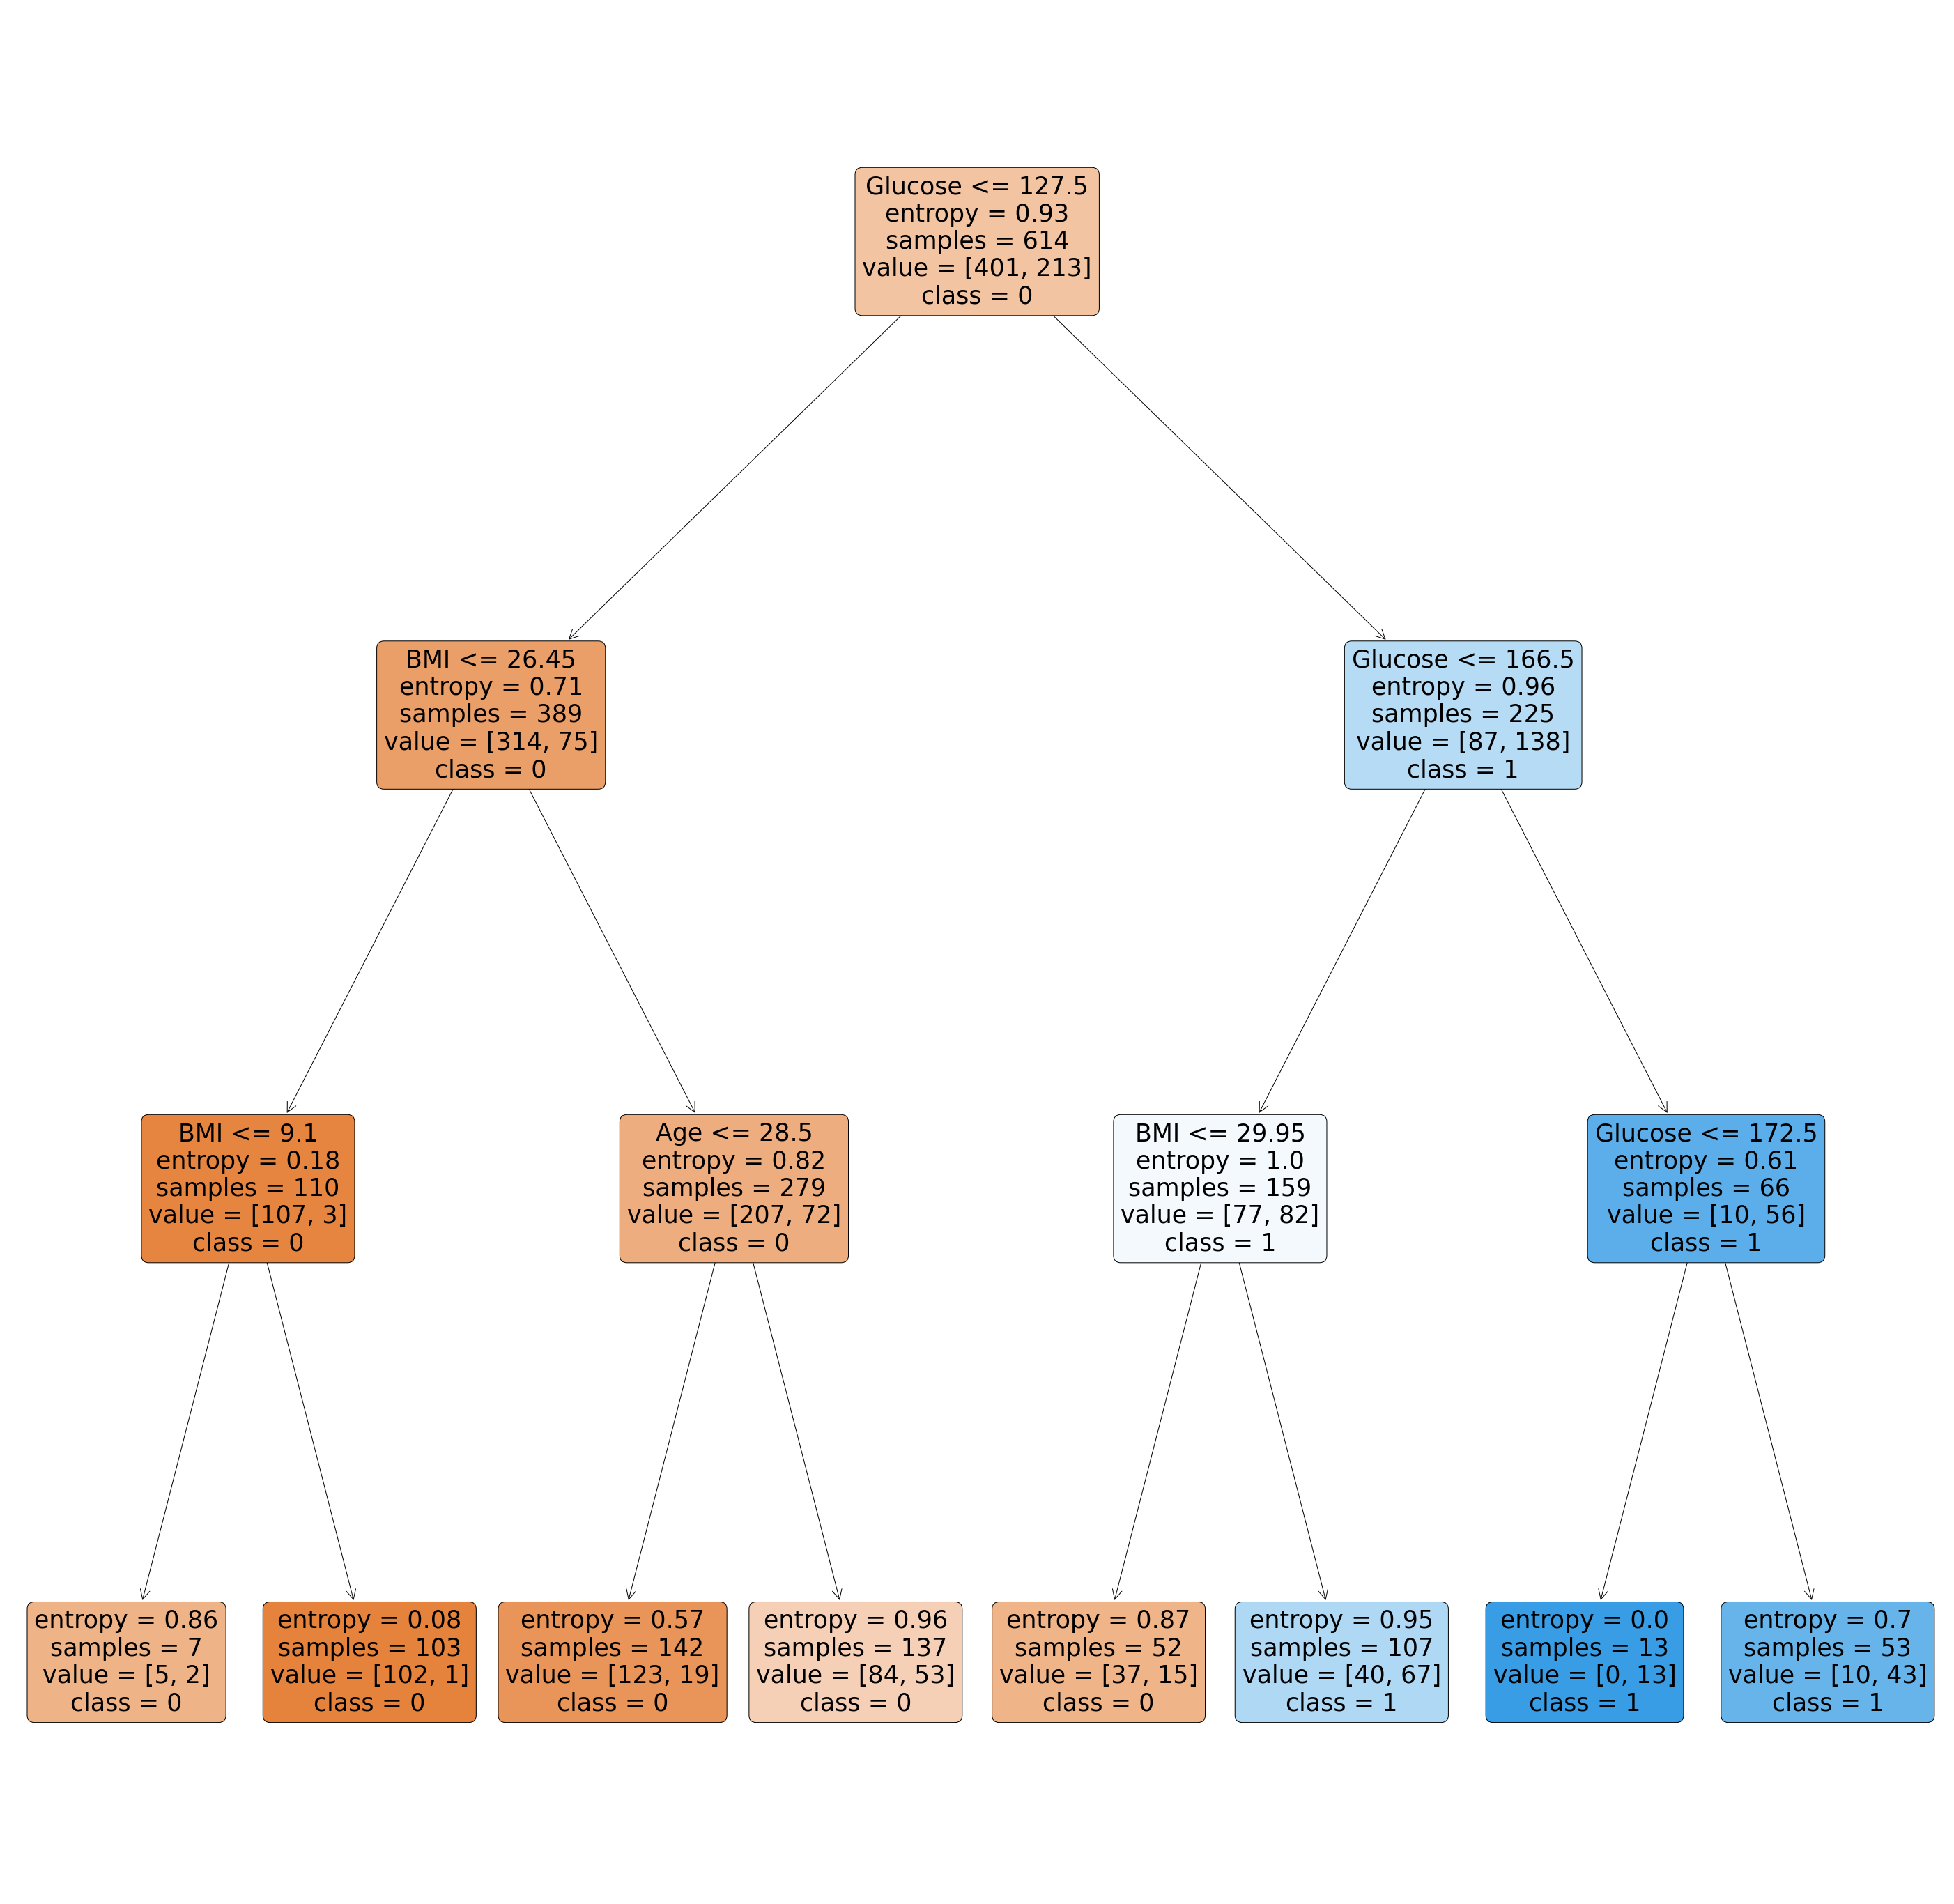

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize = (50,50))
dec_tree = plot_tree(decision_tree=Dt, feature_names = df.columns,class_names =["0","1"] , filled = True , precision = 2, rounded = True)